### Cardiac Arrhythmia Multi-Class Classification 

Decide aboute a good evaluation strategy and justify your choice. 

<font color = 'red'>Due date for full credit: April 4, 11:59 PM
    <br>
    Due date for partial credit: April 6, 11:59 PM.
    <br> No submission will be accepted after April 6. 
    <br> Please note that your term paper is also due April 6. 
    </font>

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [48]:
with open('cardiac_arrhythmia.csv') as inputfile:
    with open('arrhythmia.csv', 'w') as outputfile:
        for line in inputfile:
            outputfile.write(line.replace('?', ''))

In [49]:
# dataset with columns and row counts
data = pd.read_csv('arrhythmia.csv')
data.shape

(452, 280)

In [50]:
# dataset with datatypes and their columns
data.dtypes

age                                                        int64
sex                                                        int64
height                                                     int64
weight                                                     int64
qrs_duration                                               int64
p_r_interval                                               int64
q_t_interval                                               int64
t_interval                                                 int64
p_interval                                                 int64
qrs                                                        int64
t                                                        float64
p                                                        float64
qrst                                                     float64
j                                                        float64
heart_rate                                               float64
di_q_wave                

In [51]:
# first few rows of dataset
data.head()

,age,sex,height,weight,qrs_duration,p_r_interval,q_t_interval,t_interval,p_interval,qrs,...,v6_amp_q_wave,v6_amp_r_wave,v6_amp_s_wave,v6_amp_r'_wave,v6_amp_s'_wave,v6_amp_p_wave,v6_amp_t_wave,v6_amp_qrsa,v6_amp_qrsta,y
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [52]:
#summary stats of each columns
data.describe()

,age,sex,height,weight,qrs_duration,p_r_interval,q_t_interval,t_interval,p_interval,qrs,...,v6_amp_q_wave,v6_amp_r_wave,v6_amp_s_wave,v6_amp_r'_wave,v6_amp_s'_wave,v6_amp_p_wave,v6_amp_t_wave,v6_amp_qrsa,v6_amp_qrsta,y
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


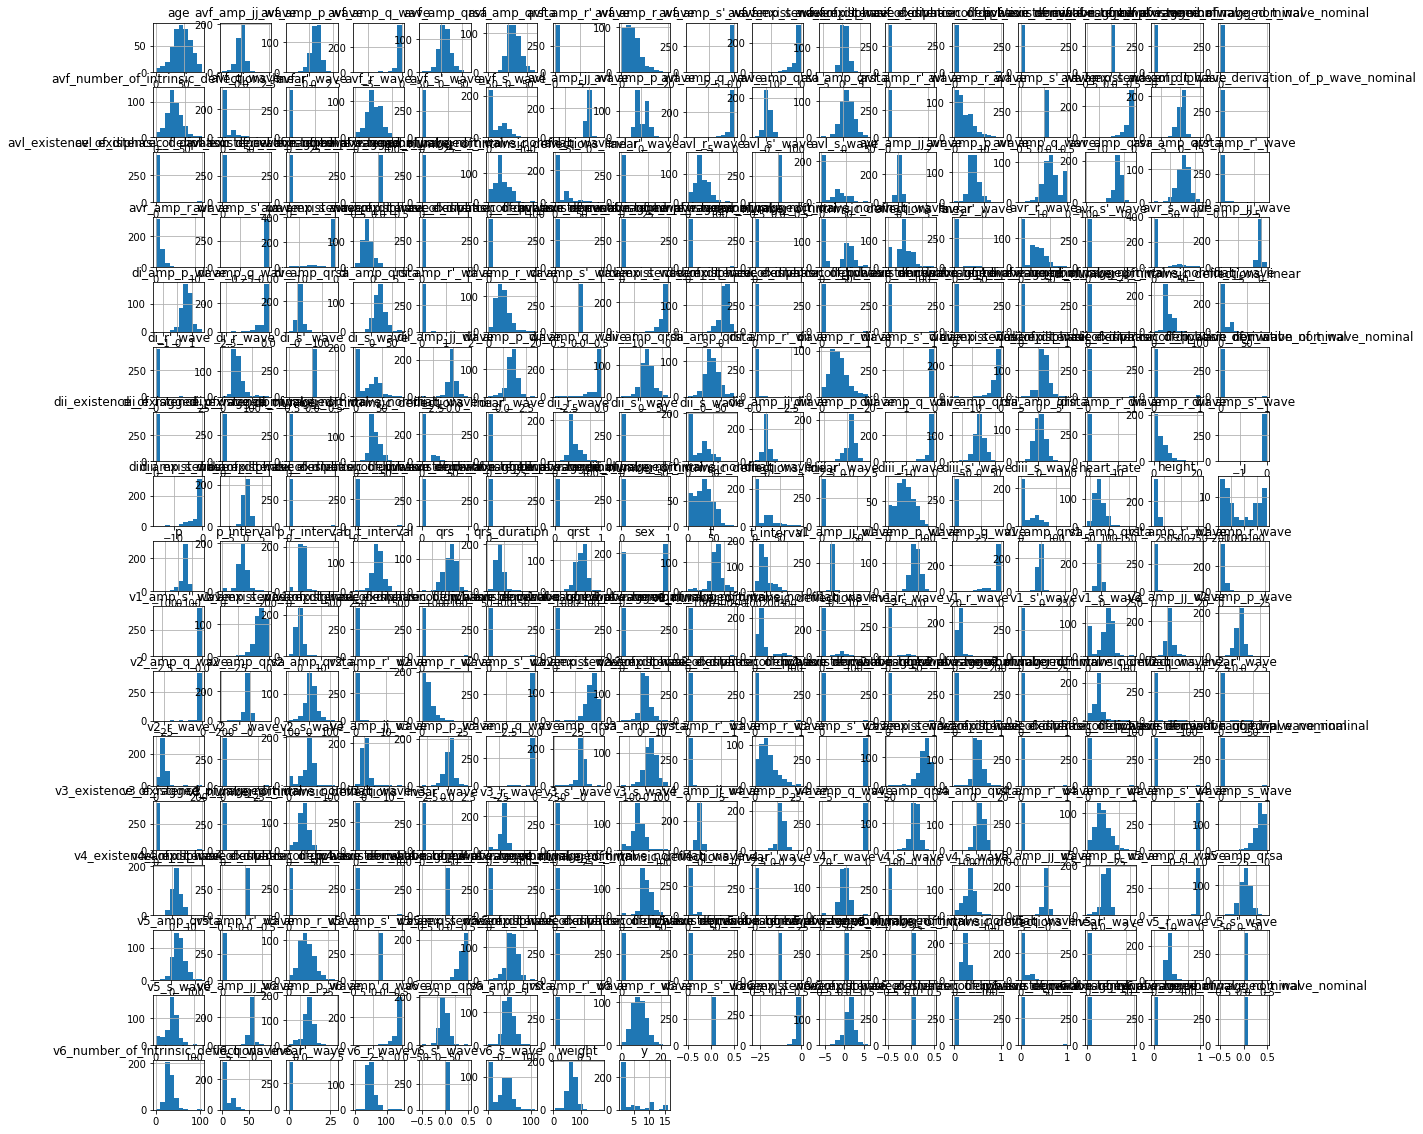

In [53]:
data.hist(sharex=False, sharey=False, figsize=(20, 20), xlabelsize=10, ylabelsize=10)
plt.show()

In [54]:
data.skew()

age                                                      -0.286886
sex                                                      -0.205284
height                                                   13.723838
weight                                                    0.167132
qrs_duration                                              2.565716
p_r_interval                                              0.037106
q_t_interval                                             -0.284812
t_interval                                                1.710357
p_interval                                               -0.165725
qrs                                                      -0.815321
t                                                        -0.987057
p                                                        -1.933900
qrst                                                     -0.459225
j                                                         0.227106
heart_rate                                                1.39

In [55]:
#Identifying the correlation across all the variables
corr = data.corr(method='pearson')

In [71]:
data_new=data_new.fillna(data_new.mean(), inplace=True)

data_new.isnull().sum()



age                                                      0
sex                                                      0
height                                                   0
weight                                                   0
qrs_duration                                             0
p_r_interval                                             0
q_t_interval                                             0
t_interval                                               0
p_interval                                               0
qrs                                                      0
t                                                        0
p                                                        0
qrst                                                     0
j                                                        0
heart_rate                                               0
di_q_wave                                                0
di_r_wave                                               

In [72]:
# Identifying the non- correlated variables and removing the correlated variables in order 
#to remove multicollinearity in variables beyond threshold 0f 0.75
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)
correlation(data_new, 0.9)

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p_r_interval',
       'q_t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'v6_amp_jj_wave', 'v6_amp_q_wave', 'v6_amp_r_wave', 'v6_amp_s_wave',
       'v6_amp_s'_wave', 'v6_amp_p_wave', 'v6_amp_t_wave', 'v6_amp_qrsa',
       'v6_amp_qrsta', 'y'],
      dtype='object', length=272)


In [73]:
X = data_new.drop(['y'],axis=1)
y = data_new['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
np.all(np.isfinite(X))
np.all(np.isnan(y))

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

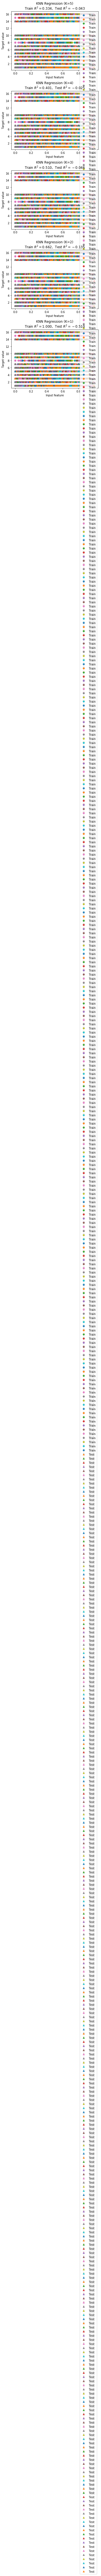

In [77]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))


for thisaxis, K in zip(subaxes, [5, 4, 3, 2, 1]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train_scaled, y_train)
    train_score = knnreg.score(X_train_scaled, y_train)
    test_score = knnreg.score(X_test_scaled, y_test)
    thisaxis.plot(X_train_scaled, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test_scaled, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

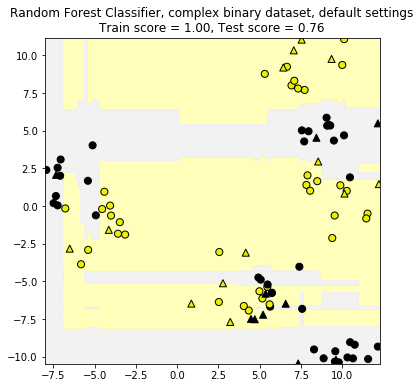

Cardiac dataset
Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.64


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.datasets import make_classification, make_blobs

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
np.all(np.isfinite(X))
np.all(np.isnan(y))

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Cardiac dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [78]:
#Logistic Regression
rom sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 1.00
Logistic Regression Test Score: 0.58


In [79]:
#Load the classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Set up a new classifier that will do a grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(
    model,
    {
        'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    },
    verbose=2,
    n_jobs=-1
)
print("Done")
#Fit the classifier to the training data, which will randomly search for hyperparameters
clf.fit(X_train, y_train)

print("DONE")

Done
Fitting 3 folds for each of 19 candidates, totalling 57 fits


C:\Users\WORK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   15.5s finished


DONE


In [80]:
#SVM Classifier
from sklearn.svm import SVR
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVR(C=10).fit(X, y)
print('Bitcoin dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X, y)))
#print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
#     .format(clf.score(X, y_test)))

Bitcoin dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99


In [81]:
from sklearn.svm import SVR
#get the best combination of C and epsilon
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
param_grid = {'C': [100,500,1000,10000],
              'epsilon': [0.1, 1, 10,20,50]}
grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
svr_linear = SVR(C=grid_search.best_params_['C'],epsilon=grid_search.best_params_['epsilon'],kernel = 'linear')
svr_linear.fit(X_train_scaled,y_train)
X_test_scaled.shape
X_test_scaled.shape
scores_test = cross_val_score(svr_linear, X_test_scaled, y_test, cv = 2)
print(scores_test)

best C: 1
best epsilon: 1
best C: 100
best epsilon: 1
[-0.90739777 -1.32246061]


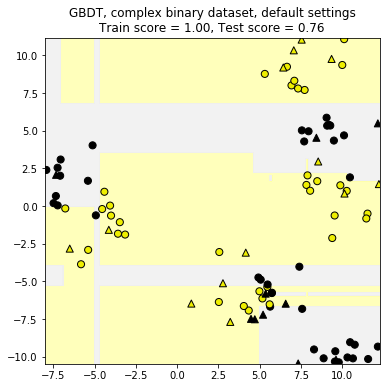

Cardiac dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.69

Cardiac dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.90
Accuracy of GBDT classifier on test set: 0.69


In [103]:
#Gradient Boosted Random Forests

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
np.all(np.isfinite(X))
np.all(np.isnan(y))

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Cardiac dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Cardiac dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [105]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=10), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.692307692308


In [106]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.582417582418


In [107]:
#Out of Bag Bagging Evaluation
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.78393351800554012

In [109]:
#PCA (Data Reduction)

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X2D = pca.fit_transform(X)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X2D, y, test_size=0.25, random_state=0)
np.all(np.isfinite(X))
np.all(np.isnan(y))

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

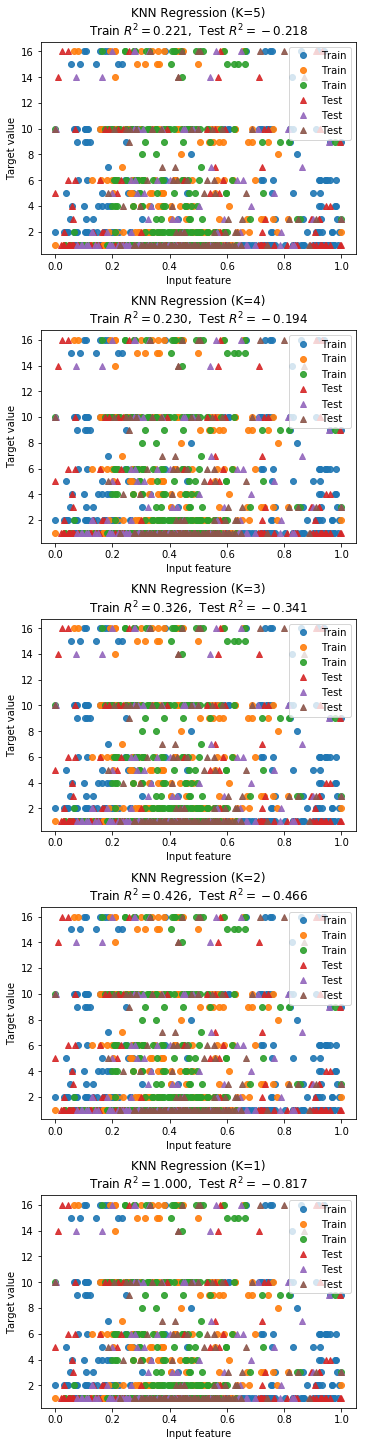

In [111]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))


for thisaxis, K in zip(subaxes, [5, 4, 3, 2, 1]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train_scaled, y_train)
    train_score = knnreg.score(X_train_scaled, y_train)
    test_score = knnreg.score(X_test_scaled, y_test)
    thisaxis.plot(X_train_scaled, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test_scaled, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

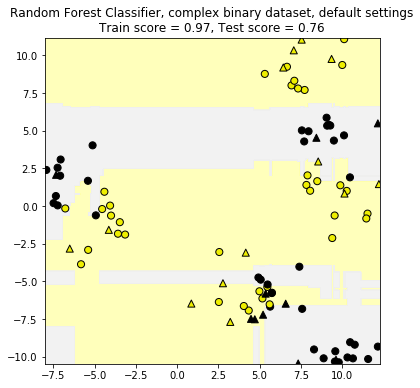

Cardiac dataset
Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.64


In [113]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.datasets import make_classification, make_blobs

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
np.all(np.isfinite(X))
np.all(np.isnan(y))

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Cardiac dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [116]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 1.00
Logistic Regression Test Score: 0.64


In [117]:
#SVM Classifier
from sklearn.svm import SVR
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVR(C=10).fit(X, y)
print('Bitcoin dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X, y)))
#print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
#     .format(clf.score(X, y_test)))

Bitcoin dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
